The most commonly used word in the selected Wikipedia articles is 'the' with a frequency of 21 times.


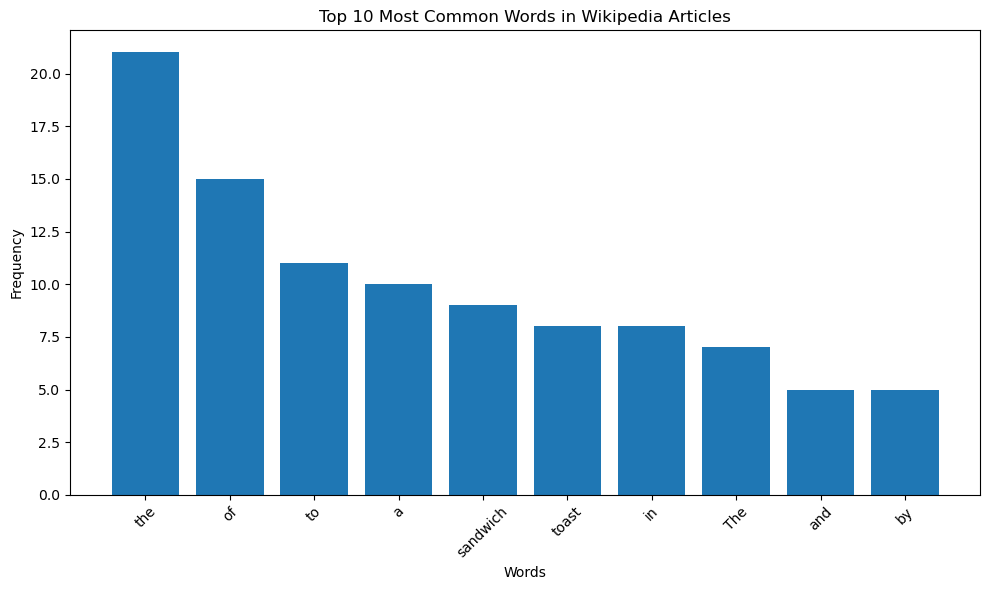

In [3]:
import requests
from bs4 import BeautifulSoup
import random
from collections import Counter
import matplotlib.pyplot as plt

# Define a list of Wikipedia article URLs
article_urls = [
    "https://en.wikipedia.org/wiki/Toast_sandwich",
    # Add more Wikipedia article URLs here
    # ...
]

# Randomly select 200 Wikipedia articles
random.shuffle(article_urls)
selected_article_urls = article_urls[:200]

# Initialize a counter for word frequencies
word_frequency_counter = Counter()

# Loop through selected articles and scrape content
for url in selected_article_urls:
    try:
        # Send a GET request to the URL
        response = requests.get(url)
        response.raise_for_status()

        # Parse the HTML content using BeautifulSoup
        soup = BeautifulSoup(response.text, 'html.parser')

        # Find the main article content using a CSS selector
        article_content = soup.select(".mw-parser-output p")

        # Extract and tokenize the text content
        article_text = "\n".join([paragraph.get_text() for paragraph in article_content])
        words = article_text.split()

        # Update word frequencies in the counter
        word_frequency_counter.update(words)

    except requests.exceptions.RequestException as e:
        print(f"Error: {e}")
    except AttributeError as ae:
        print(f"Attribute Error: {ae}")

# Get the most common word and its frequency
most_common_word, frequency = word_frequency_counter.most_common(1)[0]

# Print the most common word and its frequency
print(f"The most commonly used word in the selected Wikipedia articles is '{most_common_word}' with a frequency of {frequency} times.")

# Create a bar chart of the top 10 most common words
top_words = word_frequency_counter.most_common(10)
words, frequencies = zip(*top_words)

plt.figure(figsize=(10, 6))
plt.bar(words, frequencies)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Common Words in Wikipedia Articles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [2]:
pip install --upgrade requests


Defaulting to user installation because normal site-packages is not writeable
  Using cached requests-2.31.0-py3-none-any.whl (62 kB)
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
anaconda-project 0.11.1 requires ruamel-yaml, which is not installed.
conda-repo-cli 1.0.20 requires clyent==1.2.1, but you have clyent 1.2.2 which is incompatible.
conda-repo-cli 1.0.20 requires nbformat==5.4.0, but you have nbformat 5.5.0 which is incompatible.
conda-repo-cli 1.0.20 requires requests==2.28.1, but you have requests 2.31.0 which is incompatible.


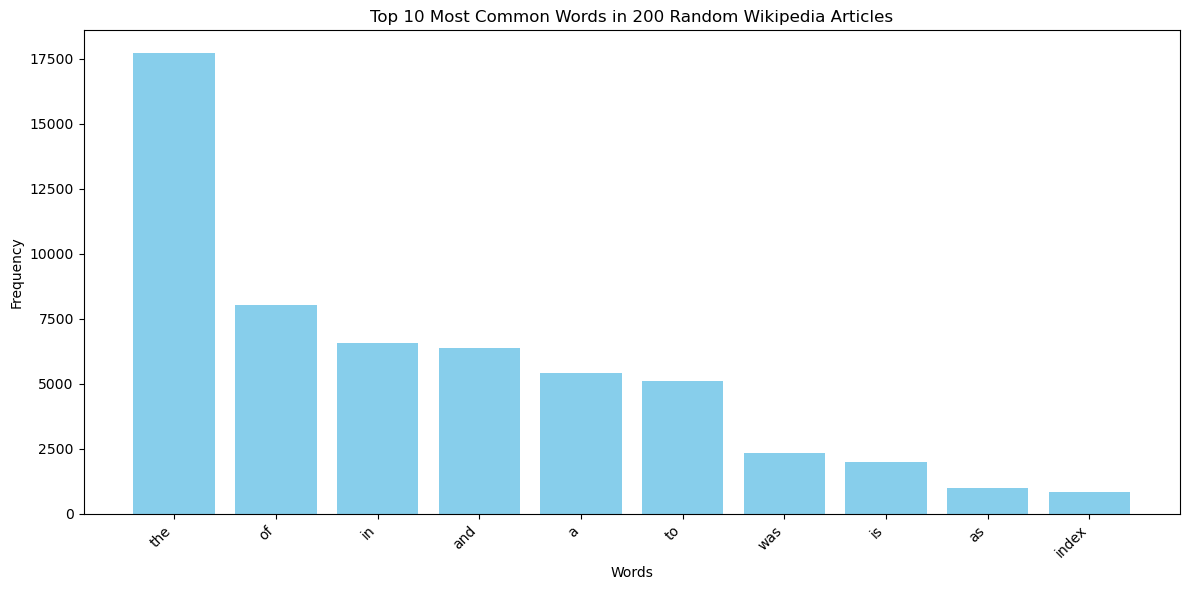

In [4]:
import requests
import random
import re
from bs4 import BeautifulSoup
from collections import Counter
import matplotlib.pyplot as plt

# Function to scrape a random Wikipedia article and return its text content
def scrape_random_wikipedia_article():
    # Generate a random Wikipedia URL
    random_article_id = random.randint(1, 1000000)
    url = f"https://en.wikipedia.org/wiki/index.php?curid={random_article_id}"

    try:
        # Send a GET request to the URL
        response = requests.get(url)
        response.raise_for_status()

        # Parse the HTML content using BeautifulSoup
        soup = BeautifulSoup(response.text, 'html.parser')

        # Find the main article content using a CSS selector
        article_content = soup.select(".mw-parser-output p")

        # Extract and return the text content
        article_text = "\n".join([paragraph.get_text() for paragraph in article_content])
        return article_text

    except requests.exceptions.RequestException:
        return None

# Function to find the most common words in a given text
def find_most_common_words(text, top_n=10):
    # Tokenize the text into words
    words = re.findall(r'\b\w+\b', text.lower())

    # Use Counter to count word occurrences
    word_counter = Counter(words)

    # Get the most common words
    most_common_words = word_counter.most_common(top_n)

    return most_common_words

# Fetch and analyze 200 random Wikipedia articles
total_articles = 200
common_words = Counter()

for _ in range(total_articles):
    article_text = scrape_random_wikipedia_article()
    if article_text:
        most_common_words = find_most_common_words(article_text)
        common_words.update(dict(most_common_words))

# Plot the most common words
top_n = 10  # Number of top common words to display
top_common_words = common_words.most_common(top_n)

words, counts = zip(*top_common_words)

plt.figure(figsize=(12, 6))
plt.bar(words, counts, color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title(f'Top {top_n} Most Common Words in {total_articles} Random Wikipedia Articles')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
